In [1]:
import numpy as np
import mlrose_hiive
from mlrose_hiive import KnapsackGenerator
import matplotlib.pyplot as plt
import time

# TnapSack

In [2]:
# Define optimization problem object
problem_no_fit = KnapsackGenerator().generate(seed=123456)

## 	randomized hill climbing

In [3]:
best_state_HC, best_fitness_HC, fitness_curve_HC = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=0, 
                                                                         init_state=None, curve=True, random_state=42)

In [33]:
# 调restart
best_state_HC5, best_fitness_HC5, fitness_curve_HC5 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=5, 
                                                                         init_state=None, curve=True, random_state=42)
best_state_HC10, best_fitness_HC10, fitness_curve_HC10 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=10, 
                                                                         init_state=None, curve=True, random_state=42)

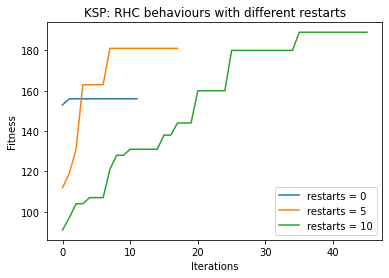

In [41]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_HC))),fitness_curve_HC[...,0],'-',label='restarts = 0')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_HC5))),fitness_curve_HC5[...,0],'-',label='restarts = 5')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_HC10))),fitness_curve_HC10[...,0],'-',label='restarts = 10')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("KSP: RHC behaviours with different restarts")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [9]:
# restarts = 10 wins

## 	simulated annealing

In [10]:
# Solve using simulated annealing - attempt 1
schedule_SA = mlrose_hiive.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
best_state_SA, best_fitness_SA, fitness_curve_SA = mlrose_hiive.simulated_annealing(problem_no_fit, schedule=schedule_SA, 
                                                                              max_attempts=10, max_iters=1000, init_state=None, 
                                                                              curve=True, random_state=42)

In [11]:
# tune temperature
schedule_arith =mlrose_hiive.ArithDecay(init_temp=10, decay=0.95, min_temp=1)
best_state_SAarith, best_fitness_SAarith, fitness_curve_SAarith = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_arith, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 1)

In [12]:
schedule_exp =mlrose_hiive.ExpDecay(init_temp=10, exp_const=0.05, min_temp=1)
best_state_SAexp, best_state_SAexp, fitness_curve_SAexp = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 2)

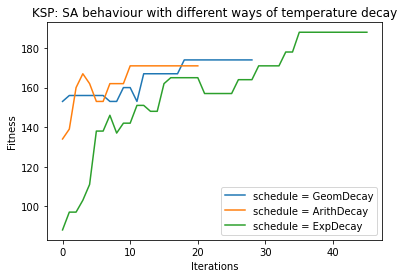

In [42]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_SA))),fitness_curve_SA[...,0],'-',label='schedule = GeomDecay')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_SAarith))),fitness_curve_SAarith[...,0],'-',label='schedule = ArithDecay')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_SAexp))),fitness_curve_SAexp[...,0],'-',label='schedule = ExpDecay')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("KSP: SA behaviour with different ways of temperature decay")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [14]:
# arithdecay  wins, then start to explore

In [36]:
# tune temperature decay
schedule_exp2 =mlrose_hiive.ExpDecay(init_temp=10, exp_const=0.1, min_temp=1)
best_state_exp2, best_fitness_exp2, fitness_curve_exp2 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp2, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 2)
schedule_exp3 =mlrose_hiive.ExpDecay(init_temp=10, exp_const=0.01, min_temp=1)
best_state_exp3, best_fitness_exp3, fitness_curve_exp3 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp3, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 1)

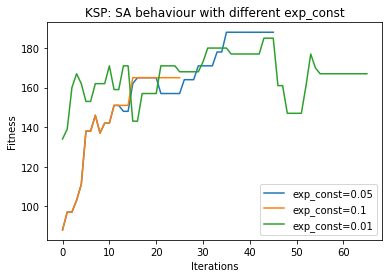

In [47]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_SAexp))),fitness_curve_SAexp[...,0],'-',label='exp_const=0.05')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_exp2))),fitness_curve_exp2[...,0],'-',label='exp_const=0.1')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_exp3))),fitness_curve_exp3[...,0],'-',label='exp_const=0.01')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("KSP: SA behaviour with different exp_const")  # Add a title to the axes.
ax.legend()  # Add a legend.

## genetic algorithm

In [17]:
# Solve using genetic algorithm
best_state_GA, best_fitness_GA, fitness_curve_GA = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, max_attempts = 100, curve=True,
                                              random_state = 2)

In [18]:
best_state_GA100, best_fitness_GA100, fitness_curve_GA100 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, pop_size=100,
                                                                         max_attempts = 100, curve=True,random_state = 2)
best_state_GA300, best_fitness_GA300, fitness_curve_GA300 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, pop_size=300,
                                                                         max_attempts = 100, curve=True,random_state = 2)

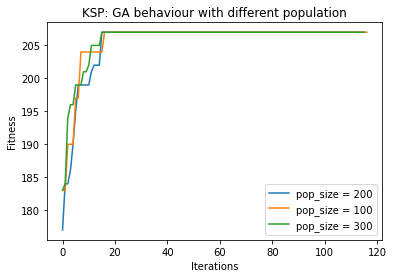

In [44]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_GA))),fitness_curve_GA[...,0],'-',label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_GA100))),fitness_curve_GA100[...,0],'-',label='pop_size = 100')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_GA300))),fitness_curve_GA300[...,0],'-',label='pop_size = 300')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("KSP: GA behaviour with different population")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [20]:
# 200 wins

## mimic

In [21]:
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem_no_fit, pop_size=200, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=1)

In [22]:
best_state_mimic100, best_fitness_mimic100, fitness_curve_mimic100 = mlrose_hiive.mimic(problem_no_fit, pop_size=100, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=2)
best_state_mimic300, best_fitness_mimic300, fitness_curve_mimic300 = mlrose_hiive.mimic(problem_no_fit, pop_size=300, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=3)

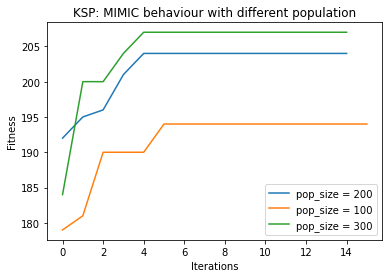

In [46]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_mimic))),fitness_curve_mimic[...,0],'-',label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_mimic100))),fitness_curve_mimic100[...,0],'-',label='pop_size = 100')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_mimic300))),fitness_curve_mimic300[...,0],'-',label='pop_size = 300')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("KSP: MIMIC behaviour with different population")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [24]:
# 300 wins

## Conclusion

In [25]:
print(best_fitness_HC10)
print(best_fitness_SAarith3)
print(best_fitness_GA300)
print(best_fitness_mimic300)

189.0
167.0
207.0
207.0


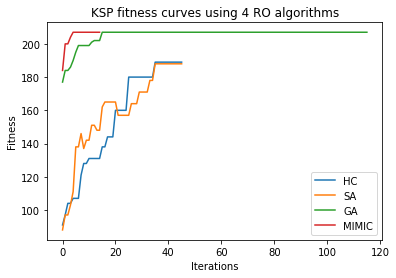

In [50]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_HC10))),fitness_curve_HC10[...,0],'-',label='HC')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_SAexp))),fitness_curve_SAexp[...,0],'-',label='SA')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_GA))),fitness_curve_GA[...,0],'-',label='GA')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_mimic300))),fitness_curve_mimic300[...,0],'-',label='MIMIC')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("KSP fitness curves using 4 RO algorithms")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [27]:
startHC10 = time.time()
best_state_HC10, best_fitness_HC10, fitness_curve_HC10 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=10, 
                                                                         init_state=None, curve=True, random_state=42)
endHC10 = time.time()
HC10time = endHC10 - startHC10
print(HC10time)

0.01664447784423828


In [51]:
startSAarith3 = time.time()
schedule_exp =mlrose_hiive.ExpDecay(init_temp=10, exp_const=0.05, min_temp=1)
best_state_SAexp, best_state_SAexp, fitness_curve_SAexp = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 2)
endSAarith3 = time.time()
SAarith3 = endSAarith3 - startSAarith3
print(SAarith3)

0.008001089096069336


In [29]:
startGA = time.time()
best_state_GA, best_fitness_GA, fitness_curve_GA = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, max_attempts = 100, curve=True,
                                              random_state = 2)
endGA = time.time()
GA = endGA - startGA
print(GA)

1.4271187782287598


In [30]:
startMIMIC = time.time()
best_state_mimic300, best_fitness_mimic300, fitness_curve_mimic300 = mlrose_hiive.mimic(problem_no_fit, pop_size=300, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=3)
endMIMIC = time.time()
MIMIC = endMIMIC - startMIMIC
print(MIMIC)

0.5731093883514404


In [31]:
runtime_list = [HC10time,SAarith3,GA,MIMIC]
print(runtime_list)
names = ["RHC", "SA","GA","MIMIC"]
print(names)

[0.01664447784423828, 0.0, 1.4271187782287598, 0.5731093883514404]
['RHC', 'SA', 'GA', 'MIMIC']


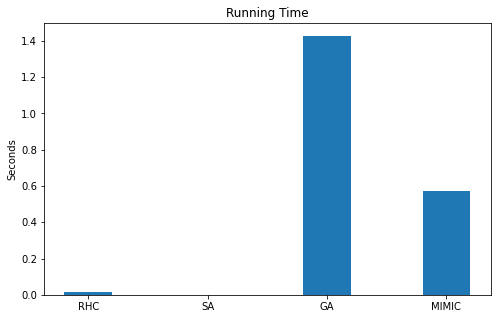

In [52]:
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(names,runtime_list, width = 0.4)
plt.ylabel("Seconds")
plt.title("Running Time")
plt.show()